<a href="https://colab.research.google.com/github/GabrielaP05/clasificacion1/blob/main/Clasificacion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://drive.google.com/uc?id=1XHmylmQS9P3NJ-71GviyRaNH2R6WQ8jq
To: /content/datos_descargados.csv
100% 12.2k/12.2k [00:00<00:00, 30.6MB/s]
datos_descargados.csv  sample_data
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


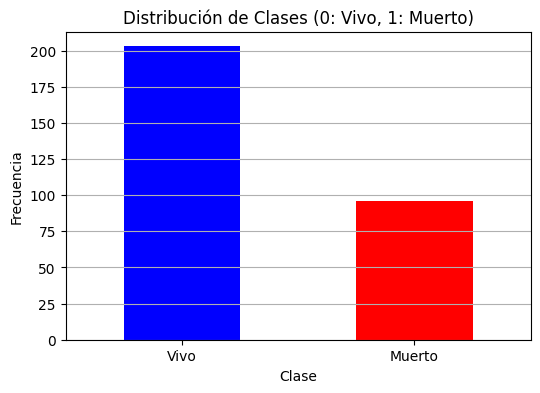

Advertencia: 'categoria_edad' no se encuentra en el DataFrame. Eliminando solo 'DEATH_EVENT'
Exactitud del árbol de decisión: 0.7333


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# gdown para descargar archivos de Google Drive
!pip install gdown

file_id = '1XHmylmQS9P3NJ-71GviyRaNH2R6WQ8jq'
file_path = f'https://drive.google.com/uc?id={file_id}'

# Descarga el archivo
!gdown {file_path}

!ls


datos_descargados = 'datos_descargados.csv'
df = pd.read_csv(datos_descargados)


# Imprime los nombres de las columnas para verificar si 'death_event' existe y busca errores tipográficos
print(df.columns)

# Paso 1: Graficar la distribución de clases
plt.figure(figsize=(6, 4))
df['DEATH_EVENT'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribución de Clases (0: Vivo, 1: Muerto)')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
# Establece las posiciones y etiquetas de las marcas
plt.xticks([0, 1], ['Vivo', 'Muerto'], rotation=0)  # Establece las marcas en las posiciones 0 y 1
plt.grid(axis='y')
plt.show()

# Paso 2: Dividir el conjunto de datos en entrenamiento y prueba (estratificado)
if 'categoria_edad' in df.columns:
    X = df.drop(columns=['DEATH_EVENT', 'categoria_edad'])
else:
    print("Advertencia: 'categoria_edad' no se encuentra en el DataFrame. Eliminando solo 'DEATH_EVENT'")
    X = df.drop(columns=['DEATH_EVENT'])

y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Paso 3: Ajustar un árbol de decisión y evaluar la precisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del árbol de decisión: {accuracy:.4f}')